# Input data visualization

Use this notebook in the container to explore and understand the [input data](https://noresmhub.github.io/NorESM_LandSites_Platform/#input-data). Use the Run button or Ctrl+Enter to execute code cells.

#### Prerequisites:

- Having downloaded the input data. 

#### Table of contents

1. Atmospheric forcing variables
    - radiation, temperature, precipitation, and wind
2. Surface data
    - population density, CLM parameters, FATES parameters


Input data files are downloaded from a server (<https://ns2806k.webs.sigma2.no/EMERALD/EMERALD_platform/inputdata_fates_platform/>) and stored in the `data/input` folder in the container. You can download and look at the raw files, and even edit them and upload them back into the container if you want to change the forcing. The .tar files are compressed, and can be opened or unzipped with e.g. 7-zip. The data files are stored in [.nc (NetCDF)](https://www.unidata.ucar.edu/software/netcdf/) format, which can be viewed using [Panoply](https://www.giss.nasa.gov/tools/panoply/), or packages in Python or [R](https://cran.r-project.org/web/packages/ncdf4/index.html). Or just follow this notebook to look at a few of the input variables!

Import libraries:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
xr.set_options(display_style="html")

# 1. Atmospheric forcing variables

Data on these variables are required for the CLM model to run:

- Incident solar radiation (FSDS), W/m2
- Temperature at the lowest atmospheric level (TBOT), degrees K (or can be C)
- Precipitation (PRECTmms), mm/s
- Wind speed at the lowest atmospheric level (WIND), m/s

The code below will load in the data and plot them over time. The code is set up for site ALP1, and will look for data in the ALP1 case directory. If you want to plot the data for another site/case, change the case name in `input_path_str` (both in the middle and at the end of the folder path!).

In [2]:
# define where to find the data files
input_path_str = "./data/ALP1_2.0.0_input/inputdata/atm/datm7/GSWP3v1/ALP1/"

Now we have specified where the files are. Next, we open the files and load them in as a data set.

In [3]:
# open and combine all the NetCDF files present in the folder into a dataset
nc_data = xr.open_mfdataset(input_path_str + '*.nc', concat_dim='time', combine='nested', decode_times=True)
# the 'open_mfdataset' function creates a multi-file dataset
# NB! Running this code cell can take some time. Be patient until the "In []: on the left goes from * to a number!

In [4]:
# decode time format to prevent bug
# Workaround (not doing it creates dependency errors within cftime module)
nc_data["time"] = nc_data.indexes["time"].to_datetimeindex()

# under this box you might get a warning (pink box).

/opt/conda/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_192/2672087146.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  nc_data["time"] = nc_data.indexes["time"].to_datetimeindex()


You have now combined a lof of files with monthly data, of several variables, into one data set (nc_data). The data object, `nc_data`, includes all the data files in the atmospheric forcing folder.
NetCDF files can be a bit confusing for beginners, so let's print our data set first to look at the structure and find which variables we have.

In [5]:
print(nc_data)

<xarray.Dataset>
Dimensions:   (time: 321200, scalar: 1, lat: 1, lon: 1)
Coordinates:
  * time      (time) datetime64[ns] 1901-01-01 ... 2010-12-31T21:00:00
Dimensions without coordinates: scalar, lat, lon
Data variables: (12/13)
    EDGEW     (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGEE     (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGES     (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGEN     (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    LONGXY    (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    ...        ...
    PRECTmms  (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    TBOT      (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float32 dask.array<c

The dataset dimensions give the spatial and temporal span of the data. 
The Data variables are first the west,east,south,north edges of the site, coordinates, and then we get the climatic variables the needs to force the climate.

Let's focus on these ones:
- FSDS = Incident solar radiation
- PRECTmms = precipitation
- TBOT= Temperature at the lowest atmospheric level, in degrees Kelvin
- WIND = Wind speed at the lowest atmospheric level, in metres/second

Plot them one by one using the cells below. 

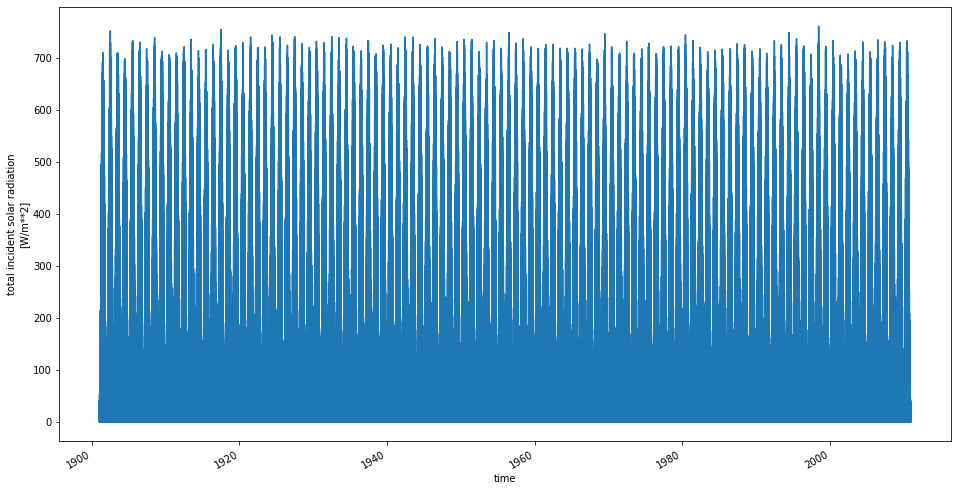

In [6]:
# plot the solar radiation
nc_data['FSDS'].plot(aspect=2, size=8)

# optional: extract the data for a specific time interval and plot it
#y1901 = nc_data.sel(time=slice('1901-01-01', '1901-12-31'))
#y1901['FSDS'].plot(aspect=2, size=8)

Look at the time axis. How does solar radiation vary through the day, and through the year?

Now we move on to the next variable, precipitation (PRECTmms).

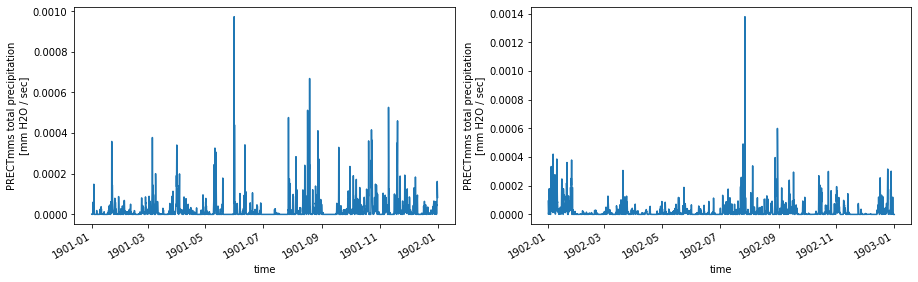

In [7]:
# plot precipitation for two years

# subset the data to get two years (change year if you want)
y1901 = nc_data.sel(time=slice('1901-01-01', '1901-12-31'))
y1902 = nc_data.sel(time=slice('1902-01-01', '1902-12-31'))

# plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) # get the plots next to each other
y1901['PRECTmms'].plot(ax=ax1)
y1902['PRECTmms'].plot(ax=ax2)

How is the variation in this variable relative to the solar radiation we plotted above? 

Next it temperature (=TBOT) at the lowest atmospheric level.

In [8]:
# before plotting temperature, we can convert from Kelvin to Celsius
TBOT = nc_data.TBOT - 273.15
TBOT.attrs = nc_data.TBOT.attrs
TBOT.attrs["units"] = "C"
TBOT

<xarray.DataArray 'TBOT' (time: 321200, lat: 1, lon: 1)>
dask.array<sub, shape=(321200, 1, 1), dtype=float32, chunksize=(248, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 ... 2010-12-31T21:00:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:  temperature at the lowest atm level
    units:      C
    mode:       time-dependent

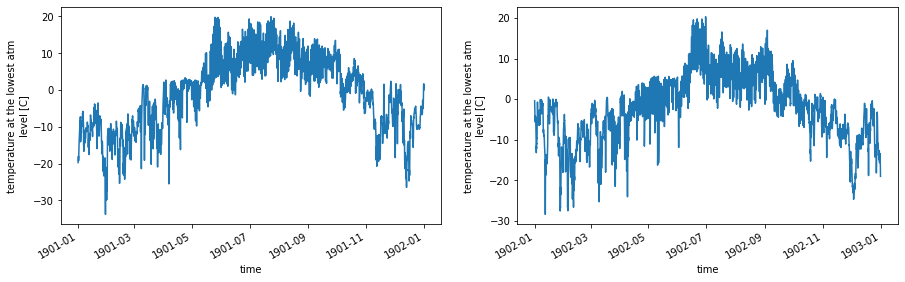

In [9]:
# plot Temperature at the lowest atmospheric level, in degrees Celsius

# subset two years
TBOT1901 = TBOT.sel(time=slice('1901-01-01', '1901-12-31'))
TBOT1902 = TBOT.sel(time=slice('1902-01-01', '1902-12-31'))

# plot two years next to each other
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4))
TBOT1901.plot(ax=ax1)
TBOT1902.plot(ax=ax2)

# Alternatively, plot temperature in entire data set
#nc_data['TBOT'].plot(aspect=2, size=8)

Notice the time axes, and the variation between years. Does it look realistic for your site?

Next up is wind speed.

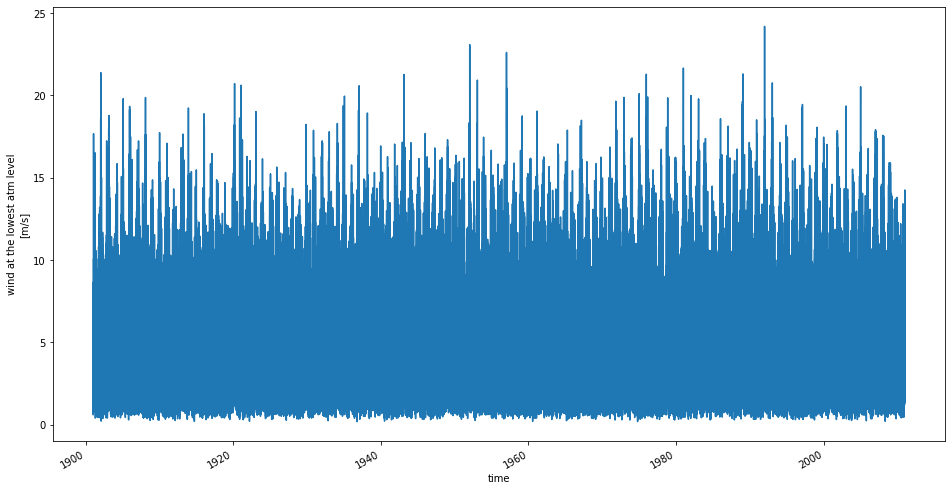

In [10]:
# plot wind speed at the lowest atmospheric level, in metres/second
nc_data['WIND'].plot(aspect=2, size=8)

# optional: add code to make subsets and new plots for one or more othertime invervals

How do you think wind speed affects the vegetation? And how could the vegetation affect wind speed?

-----------

That concludes the minimum required atmospheric forcing data! If you want to plot more, or other, variables, you can try to add cells to this notebook and copy from the plotting code above. For more plotting choices, see e.g. this guide: https://xarray.pydata.org/en/v0.12.1/plotting.html

Some food for thought: Notice which variables are very regular, and which have more variation. Think about how they relate to the site location (in the world and in the local landscape). Think about how the period the input data come from might affect your simulations in terms of what climatic conditions they represent. When is it OK, or not OK, to use input data from some years to run simulations for a different/future time period?

# 2. Surface data

[Surface data](https://noresmhub.github.io/NorESM_LandSites_Platform/#surface-data) are kept under the lnd=land instead of the atm=atmosphere directory within our input data folder. Under 'clm2', you will find: 

- 'firedata'
    - population density 
- 'paramdata'
    - CLM5 parameters: many parameters, covering e.g. Plant Functional Types (PFTs), allocation of carbon, photosynthetic pathway
    - FATES parameters: many parameters, covering e.g. Plant Functional Types (PFTs), allometry, carbon pools, nitrogen uptake, mortality, recruitment, fuel load for fire module 
- 'snicardata'
    - snow "growth" parameters
    - snow "optics"
- 'surfdata_map'
    - surface data:  soil depth & other properties, albedo & thermal conductance of different surface types, and fraction of gridcell covered by vegetation, land, & other land cover types
- 'urbandata'
    - urban classes, building interior temperature

Similar to above, read in the path to the files and plot a few variables. We can start with 'firedata' which contains population densities.

In [11]:
# define where to find the data files
input_path_str2 = "./data/ALP1_2.0.0_input/inputdata/lnd/clm2/firedata/ALP1"

# open and combine all the NetCDF data files + decode time to prevent bug
firedata = xr.open_mfdataset(input_path_str2 + '/*.nc', combine='by_coords', decode_times=True)
firedata["time"] = firedata.indexes["time"].to_datetimeindex()

/opt/conda/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_192/378184464.py:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  firedata["time"] = firedata.indexes["time"].to_datetimeindex()


Take a look at the data set to see what we have:

In [12]:
print(firedata)

<xarray.Dataset>
Dimensions:    (time: 167, lat: 1, lon: 1, nv: 2, scalar: 1)
Coordinates:
  * time       (time) datetime64[ns] 1850-07-02T12:00:00 ... 2016-07-02T12:00:00
  * lon        (lon) float32 8.123
  * lat        (lat) float32 61.02
Dimensions without coordinates: nv, scalar
Data variables:
    hdm        (time, lat, lon) float32 dask.array<chunksize=(167, 1, 1), meta=np.ndarray>
    time_bnds  (time, nv) object dask.array<chunksize=(167, 2), meta=np.ndarray>
    year       (time) int32 dask.array<chunksize=(167,), meta=np.ndarray>
    LONGXY     (lat, lon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    LON        (lon) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LATIXY     (lat, lon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    LAT        (lat) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LANDMASK   (lat, lon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    EDGEW      (scalar) float32 dask.array<chunksize=(1,), meta=np.

The 'firedata' is a bit different from the last dataset, and has more metadata but fewer variables.
Let's try to plot the first one, `hdm`, to see what it is.

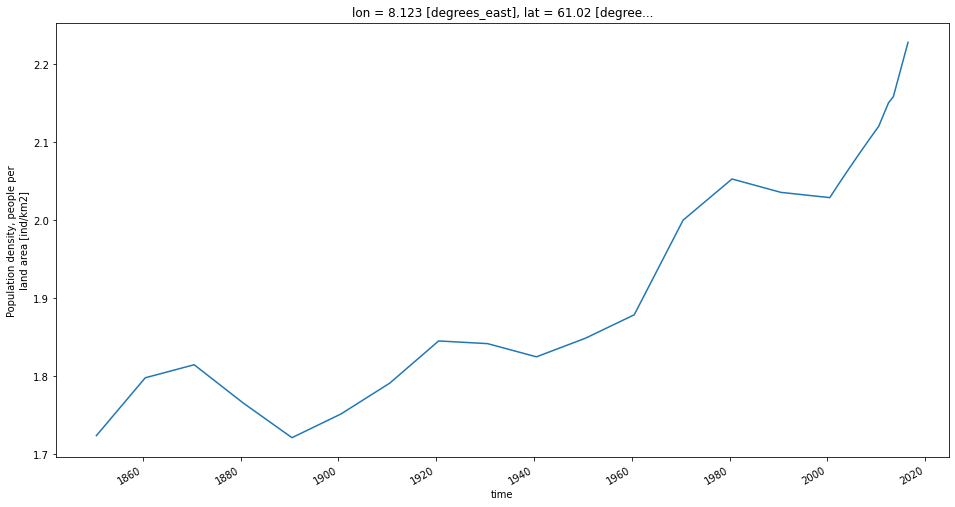

In [13]:
# plot
firedata['hdm'].plot(aspect=2, size=8)

What are we looking at? Is this realistic for the site?

### CLM parameters

Next, let's read in the parameters for the CLM model.

In [14]:
# path to the files
input_path_str3 = "./data/ALP1_2.0.0_input/inputdata/lnd/clm2/paramdata/"
# open CLM parameter file
clm_params = xr.open_dataset(input_path_str3 + 'clm5_params.c200402.nc')

In [15]:
print(clm_params)

<xarray.Dataset>
Dimensions:                     (pft: 79, segment: 4, allpfts: 1, variants: 2)
Coordinates:
    pftname                     (pft) |S40 ...
  * segment                     (segment) |S40 b'sunlit                      ...
Dimensions without coordinates: pft, allpfts, variants
Data variables: (12/283)
    FUN_fracfixers              (pft) float64 ...
    a_coef                      float64 ...
    a_exp                       float64 ...
    a_fix                       (pft) float64 ...
    accum_factor                float64 ...
    act25                       float64 ...
    ...                          ...
    xl                          (pft) float64 ...
    z0mr                        (pft) float64 ...
    z_dl                        float64 ...
    zlnd                        float64 ...
    zsno                        float64 ...
    ztopmx                      (pft) float64 ...
Attributes:
    history:                    Thu Aug 29 14:08:51 2019: ncks --exclude -v 

You can see from the long list that the CLM model has a lot of parameters. Can you recognise or guess what some of the parameters mean? Figuring out the meaning of single parameters can be a bit difficult, but some information is in the [CLM documentation](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/setting-up-and-running-a-case/master_list_file.html). To fully understand how each parameter is used, you need to dig into the model code. Because we use the FATES model for natural vegetation, some of the CLM parameters that govern the simpler, standard vegetation model are not in use.

For now, let's just look at a few selected variables. We can start with the land model (CLM) parameter 'lake_decomp_fact'. What is it? Try to replace the parameter with a few others from the list below and run the code cell again:

- pftnum                      
- organic_max
- accum_factor
- planting_temp               
- max_SH_planting_date
- crop   
- csoilc                      
- cv  
- cwd_fcel  
- minfuel   
- oxinhib

Feel free to explore different or additional parameters from the full list. Note that some parameters are single values, while others have one value per Plant Functional Type (natural vegetation + crop types)

In [16]:
# view single parameters (data variables) from the clm_params data
clm_params['lake_decomp_fact']

<xarray.DataArray 'lake_decomp_fact' ()>
array(9.e-11)
Attributes:
    long_name:  Base decomposition rate (1/s) at 25oC in lake
    units:      1/s

### FATES parameters

Now we can do the same to look through some FATES model parameters. For detailed information about how the model works, see the [FATES documentation](https://fates-users-guide.readthedocs.io/projects/tech-doc/en/stable/).

In [17]:
# open FATES parameter file
fates_params = xr.open_dataset(input_path_str3 + 'fates_params_api.14.0.0_12pft_c200921.nc')

In [18]:
print(fates_params)

<xarray.Dataset>
Dimensions:                                (fates_history_age_bins: 7,
                                            fates_history_coage_bins: 2,
                                            fates_history_height_bins: 6,
                                            fates_history_size_bins: 13,
                                            fates_pft: 12, fates_prt_organs: 6,
                                            fates_hydr_organs: 4,
                                            fates_leafage_class: 1,
                                            fates_litterclass: 6, fates_NCWD: 4)
Dimensions without coordinates: fates_history_age_bins,
                                fates_history_coage_bins,
                                fates_history_height_bins,
                                fates_history_size_bins, fates_pft,
                                fates_prt_organs, fates_hydr_organs,
                                fates_leafage_class, fates_litterclass,
               

After you have run the next cell to see the names of PFTs included in your case, replace the parameter name with another from the list and re-run the code cell:

- fates_leaf_slamax
- fates_prt_organ_name                   
- fates_branch_turnover                  
- fates_phen_evergreen   
- fates_recruit_hgt_min                   


In [19]:
fates_params['fates_recruit_hgt_min']

<xarray.DataArray 'fates_recruit_hgt_min' (fates_pft: 12)>
array([1.3  , 1.3  , 1.3  , 1.3  , 1.3  , 1.3  , 0.75 , 0.75 , 0.75 , 0.125,
       0.125, 0.125])
Dimensions without coordinates: fates_pft
Attributes:
    units:      m
    long_name:  the minimum height (ie starting height) of a newly recruited ...

Which CLM parameters do you think are replaced by FATES when we use FATES instead of the simpler 'one big leaf covers the entire gridcell' standard CLM vegetation scheme?